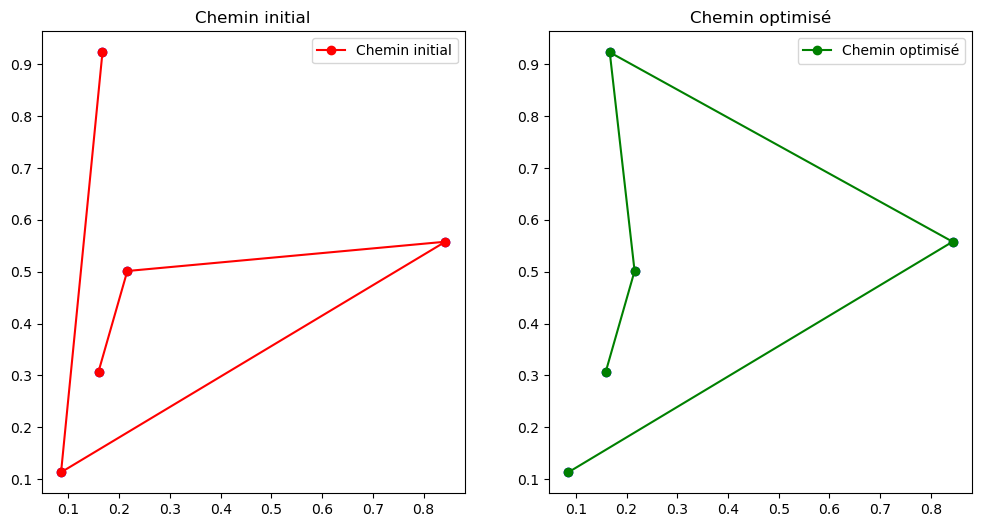

Meilleur chemin trouvé : [1 2 0 3 4]
Coût du chemin optimisé : 2.481885139479535


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du problème
N = 5  # Nombre de villes
T0 = 1000  # Température initiale
T_min = 1e-3  # Température minimale
alpha = 0.995  # Facteur de décroissance de la température
max_iterations = 10000  # Nombre maximal d'itérations

# Génération aléatoire des villes (coordonnées x et y)
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)
chemin = np.arange(N)  # Chemin initial simple: ordre naturel des villes

# Fonction de coût : calcule la distance totale du chemin
def function_cout(chemin):
    dx = x[chemin] - np.roll(x[chemin], -1)
    dy = y[chemin] - np.roll(y[chemin], -1)
    return np.sum(np.sqrt(dx**2 + dy**2))

# Fonction pour générer un voisin en échangeant deux villes aléatoirement
def generate_voisin(chemin):
    new_chemin = chemin.copy()
    i, j = np.random.choice(len(new_chemin), 2, replace=False)  # Choisir 2 indices aléatoires
    new_chemin[i], new_chemin[j] = new_chemin[j], new_chemin[i]  # Échanger les villes
    return new_chemin

# Algorithme de recuit simulé
def recuit_simule():
    global chemin
    T = T0  # Température initiale

    current_chemin = chemin.copy()
    best_chemin = chemin.copy()

    current_cout = function_cout(current_chemin)
    best_cout = current_cout

    iteration = 0

    while T > T_min and iteration < max_iterations:
        # Générer un voisin
        new_chemin = generate_voisin(current_chemin)
        new_cout = function_cout(new_chemin)

        # Calcul de la différence d'énergie (changement de coût)
        delta_E = new_cout - current_cout

        if delta_E < 0:
            accept = True  # Toujours accepter si la nouvelle solution est meilleure
        else:
            # Accepter avec une certaine probabilité selon Metropolis
            accept = np.random.rand() < np.exp(-delta_E / T)

        if accept:
            current_chemin = new_chemin
            current_cout = new_cout

            # Mise à jour de la meilleure solution trouvée
            if new_cout < best_cout:
                best_chemin = new_chemin
                best_cout = new_cout

        # Réduction de la température
        T *= alpha
        iteration += 1

    return best_chemin, best_cout

# Affichage du chemin initial
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x[chemin], y[chemin], marker='o', color='r', linestyle='-', label='Chemin initial')
plt.scatter(x, y, color='b')
plt.title("Chemin initial")
plt.legend()

# Exécution de l'algorithme de recuit simulé
best_chemin, best_cout = recuit_simule()

# Affichage du chemin optimisé
plt.subplot(1, 2, 2)
plt.plot(x[best_chemin], y[best_chemin], marker='o', color='g', linestyle='-', label='Chemin optimisé')
plt.scatter(x, y, color='b')
plt.title("Chemin optimisé")
plt.legend()

plt.show()

# Résultat final
print("Meilleur chemin trouvé :", best_chemin)
print("Coût du chemin optimisé :", best_cout)
